# Predict survival of passengers traveling in RMS Titanic using Logistic Regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/BoardInfinity/main/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
titanic.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [6]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
titanic.Embarked.mode()

0    S
dtype: object

In [8]:
type(titanic.Embarked.mode())

pandas.core.series.Series

In [9]:
titanic.Embarked.mode()[0]

'S'

In [10]:
titanic.Embarked.fillna(titanic.Embarked.mode()[0], inplace=True)
titanic.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [11]:
sns.set_style('darkgrid')

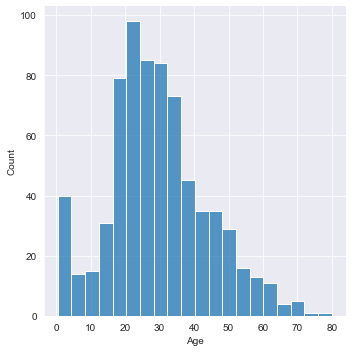

In [12]:
sns.displot(titanic.Age);

In [13]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [14]:
titanic.Age.median()

28.0

In [15]:
titanic.Age.fillna(titanic.Age.median(),inplace=True)

In [16]:
titanic.isna().sum().sort_values(ascending=False)

Cabin          687
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [17]:
titanic.drop('Cabin', axis=1, inplace=True)
titanic.isna().sum().sort_values(ascending=False)

Embarked       0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Happy Learning

In [19]:
titanic.drop(['Name','Ticket'], axis=1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [20]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [21]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [22]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [23]:
titanic['FamilySize'] = titanic.SibSp + titanic.Parch + 1
# Sib = 1
# Spouse = 1
# Child = 1
# Parent = 2

titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,male,22.0,1,0,7.2500,S,2
1,2,1,1,female,38.0,1,0,71.2833,C,2
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,2
4,5,0,3,male,35.0,0,0,8.0500,S,1


In [24]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.065997
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.245619
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.245619,0.890712,0.783111,0.217138,1.000000


In [25]:
titanic.drop(['SibSp','Parch'], axis=1, inplace=True)
titanic.corr()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.034212,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.064910,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.339898,-0.549500,0.065997
Age,0.034212,-0.064910,-0.339898,1.000000,0.096688,-0.245619
Fare,0.012658,0.257307,-0.549500,0.096688,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.245619,0.217138,1.000000


In [26]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
# Feature Engineering
# Segmenting Sex col
# If Age is less than 15 --> Child
# Else Keep it as it is

titanic['GenderClass'] = titanic.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'], axis=1)

In [28]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,GenderClass
792,793,0,3,female,28.0,69.5500,S,11,female
53,54,1,2,female,29.0,26.0000,S,2,female
445,446,1,1,male,4.0,81.8583,S,3,child
590,591,0,3,male,35.0,7.1250,S,1,male
168,169,0,1,male,28.0,25.9250,S,1,male


In [29]:
titanic[ titanic.Age < 15 ].head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,GenderClass
7,8,0,3,male,2.0,21.0750,S,5,child
9,10,1,2,female,14.0,30.0708,C,2,child
10,11,1,3,female,4.0,16.7000,S,3,child
14,15,0,3,female,14.0,7.8542,S,1,child
16,17,0,3,male,2.0,29.1250,Q,6,child


In [30]:
titanic[ titanic.Age < 15 ].count()

PassengerId    78
Survived       78
Pclass         78
Sex            78
Age            78
Fare           78
Embarked       78
FamilySize     78
GenderClass    78
dtype: int64

In [31]:
titanic.GenderClass.value_counts()

male      538
female    275
child      78
Name: GenderClass, dtype: int64

In [32]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,male,22.0,7.2500,S,2,male
1,2,1,1,female,38.0,71.2833,C,2,female
2,3,1,3,female,26.0,7.9250,S,1,female
3,4,1,1,female,35.0,53.1000,S,2,female
4,5,0,3,male,35.0,8.0500,S,1,male


In [33]:
titanic.drop('Sex', axis=1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Age,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,22.0,7.2500,S,2,male
1,2,1,1,38.0,71.2833,C,2,female
2,3,1,3,26.0,7.9250,S,1,female
3,4,1,1,35.0,53.1000,S,2,female
4,5,0,3,35.0,8.0500,S,1,male


## One Hot Encoding / Dummification

__get_dummies()__

https://stackoverflow.com/questions/50176096/removing-redundant-columns-when-using-get-dummies

In [34]:
titanic = pd.get_dummies(titanic, columns=['GenderClass','Embarked'], drop_first=True)
titanic.head()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,2,0,1,0,1
1,2,1,1,38.0,71.2833,2,1,0,0,0
2,3,1,3,26.0,7.9250,1,1,0,0,1
3,4,1,1,35.0,53.1000,2,1,0,0,1
4,5,0,3,35.0,8.0500,1,0,1,0,1


In [35]:
titanic.drop('PassengerId', axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,0,1,0,1
1,1,1,38.0,71.2833,2,1,0,0,0
2,1,3,26.0,7.9250,1,1,0,0,1
3,1,1,35.0,53.1000,2,1,0,0,1
4,0,3,35.0,8.0500,1,0,1,0,1


In [36]:
X = titanic.loc[:, titanic.columns != 'Survived']
X.head()

,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,3,22.0,7.2500,2,0,1,0,1
1,1,38.0,71.2833,2,1,0,0,0
2,3,26.0,7.9250,1,1,0,0,1
3,1,35.0,53.1000,2,1,0,0,1
4,3,35.0,8.0500,1,0,1,0,1


In [37]:
y = titanic.Survived

In [50]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
X_train.head()

,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
140,3,28.0,15.2458,3,1,0,0,0
439,2,31.0,10.5000,1,0,1,0,1
817,2,31.0,37.0042,3,0,1,0,0
378,3,20.0,4.0125,1,0,1,0,0
491,3,21.0,7.2500,1,0,1,0,1


In [40]:
y_train.head()

140    0
439    0
817    0
378    0
491    0
Name: Survived, dtype: int64

In [41]:
# Modeling

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [42]:
y_pred_train = model.predict(X_train)

y_pred_test = model.predict(X_test)

In [43]:
# Model Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [44]:
accuracy_score(y_train, y_pred_train)

0.9817415730337079

In [45]:
accuracy_score(y_test,y_pred_test)

0.7877094972067039

In [46]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       110
           1       0.77      0.64      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



In [47]:
f1_score(y_test,y_pred_test)

0.6984126984126984

In [48]:
confusion_matrix(y_test,y_pred_test)

array([[97, 13],
       [25, 44]])

In [49]:
mis = 13+25
mis

38

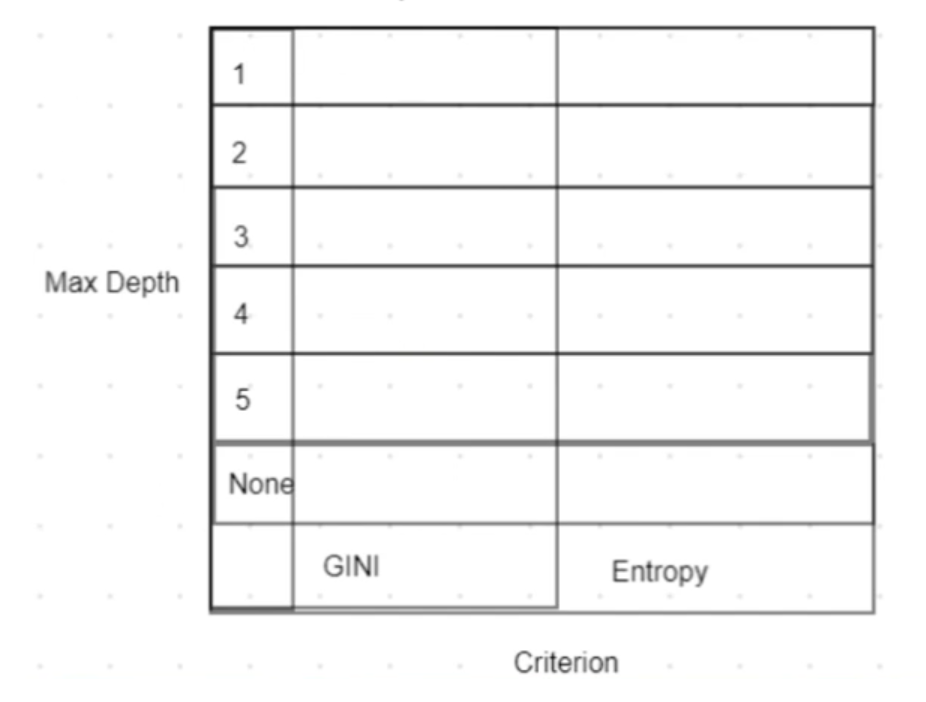

In [53]:
param_dist = {
    "criterion" : ['gini','entropy'],
    'max_depth' : [1,2,3,4,5,None]
}
param_dist

{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, None]}

In [54]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.model_selection import GridSearchCV

# grid = GridSearchCV(model, param_grid=param_dist, n_jobs=-1, cv=5)
# or
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_dist, n_jobs=-1, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, None]})

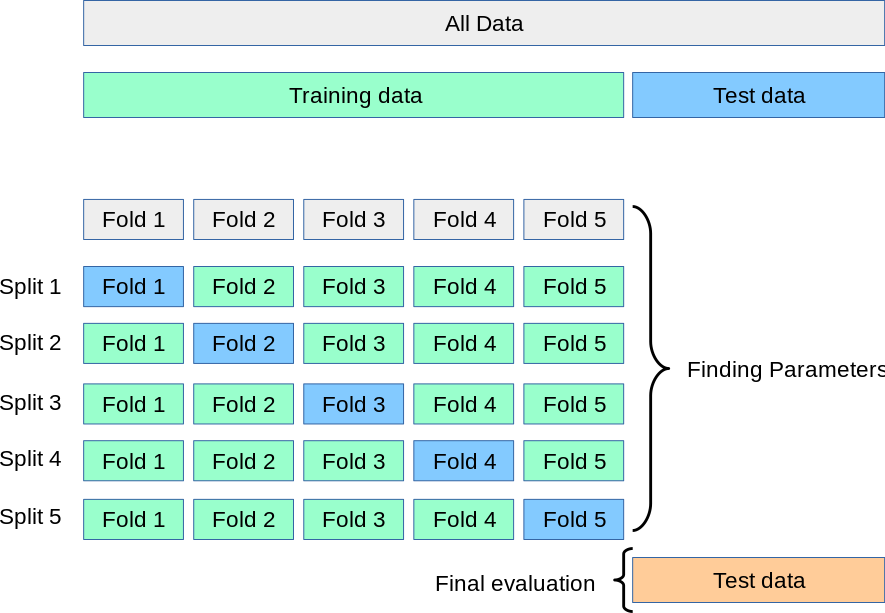

In [55]:
grid.best_estimator_ # criteion = gini and Max_depth = 5

DecisionTreeClassifier(max_depth=5, random_state=0)

In [56]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [57]:
grid.best_score_

0.8272825765783512

In [58]:
y_pred_grid = grid.predict(X_test)

In [59]:
y_pred_gridtrain = grid.predict(X_train)

In [60]:
accuracy_score(y_test, y_pred_grid)

0.8156424581005587

In [61]:
accuracy_score(y_train, y_pred_gridtrain)

0.8581460674157303

In [62]:
param_dist = {
    "criterion" : ['gini','entropy'],
    'max_depth' : range(2,60),
    'max_features' : ['auto', 'sqrt', 'log2'],
    'min_samples_split': range(2,20)
}
param_dist

{'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 60),
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_split': range(2, 20)}

In [63]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.model_selection import GridSearchCV

# gridnew = GridSearchCV(model, param_grid=param_dist, n_jobs=-1, cv=5)
# Or
gridnew = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_dist, n_jobs=-1, cv=5)

gridnew.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 60),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 20)})

In [64]:
gridnew.best_estimator_ # criteion = gini and Max_depth = 5

DecisionTreeClassifier(max_depth=8, max_features='log2', min_samples_split=13,
                       random_state=0)

In [65]:
gridnew.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_split': 13}

In [66]:
gridnew.best_score_

0.8272333300502315

In [67]:
y_pred_gridnew = gridnew.predict(X_test)

In [68]:
y_pred_gridnewtrain = gridnew.predict(X_train)

In [69]:
accuracy_score(y_test, y_pred_gridnew)

0.8268156424581006

In [70]:
accuracy_score(y_train, y_pred_gridnewtrain)

0.8792134831460674

# Happy Learning

In [74]:
param_dist = {
    "penalty" : ['l1', 'l2', 'elasticnet', 'none'],
    'fit_intercept' : [True, False],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}
param_dist

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'fit_intercept': [True, False],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.model_selection import GridSearchCV

# gridnew = GridSearchCV(model, param_grid=param_dist, n_jobs=-1, cv=5)
# Or
gridnew = GridSearchCV(LogisticRegression(random_state=0), param_grid=param_dist, n_jobs=-1, cv=5)

gridnew.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [77]:
gridnew.best_estimator_ 

LogisticRegression(random_state=0)

In [78]:
gridnew.best_params_

{'fit_intercept': True, 'penalty': 'l2', 'solver': 'lbfgs'}

In [79]:
gridnew.best_score_

0.8230572244656752

In [80]:
y_pred_gridnew = gridnew.predict(X_test)

In [81]:
y_pred_gridnewtrain = gridnew.predict(X_train)

In [82]:
accuracy_score(y_test, y_pred_gridnew)

0.8156424581005587

In [83]:
accuracy_score(y_train, y_pred_gridnewtrain)

0.8258426966292135

In [84]:
param_dist = {
    "criterion" : ['gini','entropy'],
    'max_depth' : range(2,60),
    'max_features' : ['auto', 'sqrt', 'log2'],
    'min_samples_split': range(2,20)
}
param_dist

{'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 60),
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_split': range(2, 20)}

In [86]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

# gridnew = RandomizedSearchCV(model, param_distributions=param_dist, n_jobs=-1, cv=5)
# Or
gridnew = RandomizedSearchCV(DecisionTreeClassifier(random_state=0), param_distributions=param_dist, n_jobs=-1, cv=5)

gridnew.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 60),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': range(2, 20)})

In [87]:
gridnew.best_estimator_ 

DecisionTreeClassifier(criterion='entropy', max_depth=36, max_features='sqrt',
                       min_samples_split=18, random_state=0)

In [88]:
gridnew.best_params_

{'min_samples_split': 18,
 'max_features': 'sqrt',
 'max_depth': 36,
 'criterion': 'entropy'}

In [89]:
gridnew.best_score_

0.8117699202206244

In [90]:
y_pred_gridnew = gridnew.predict(X_test)

In [91]:
y_pred_gridnewtrain = gridnew.predict(X_train)

In [92]:
accuracy_score(y_test, y_pred_gridnew)

0.8379888268156425

In [93]:
accuracy_score(y_train, y_pred_gridnewtrain)

0.8693820224719101

In [94]:
param_dist = {
    "criterion" : ['gini','entropy'],
    'max_depth' : range(2,60),
    'max_features' : ['auto', 'sqrt', 'log2'],
    'min_samples_split': range(2,20)
}
param_dist

{'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 60),
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_split': range(2, 20)}

In [95]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

# gridnew = RandomizedSearchCV(model, param_distributions=param_dist, n_jobs=-1, cv=5, n_iter=100)
# Or
gridnew = RandomizedSearchCV(DecisionTreeClassifier(random_state=0), param_distributions=param_dist, n_jobs=-1, cv=5, n_iter=100)

gridnew.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 60),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': range(2, 20)})

In [96]:
gridnew.best_estimator_ 

DecisionTreeClassifier(max_depth=8, max_features='log2', min_samples_split=12,
                       random_state=0)

In [97]:
gridnew.best_params_

{'min_samples_split': 12,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'gini'}

In [98]:
gridnew.best_score_

0.821589677927706

In [99]:
y_pred_gridnew = gridnew.predict(X_test)

In [100]:
y_pred_gridnewtrain = gridnew.predict(X_train)

In [101]:
accuracy_score(y_test, y_pred_gridnew)

0.8212290502793296

In [102]:
accuracy_score(y_train, y_pred_gridnewtrain)

0.8792134831460674

# Happy Learning

# Random Forest

In [103]:
# Modeling
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [104]:
y_pred_train = model.predict(X_train)

y_pred_test = model.predict(X_test)

In [105]:
# Model Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [106]:
accuracy_score(y_train, y_pred_train)

0.9817415730337079

In [107]:
accuracy_score(y_test,y_pred_test)

0.8491620111731844

In [108]:
param_dist = {
    'n_estimators' : range(10,200,10),
    "criterion" : ['gini','entropy','log_loss'],
    'max_depth' : range(2,60),
    'max_features' : ["sqrt","log2", None],
    'max_leaf_nodes' : [2,4,6,8,10,14]
}
param_dist

{'n_estimators': range(10, 200, 10),
 'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': range(2, 60),
 'max_features': ['sqrt', 'log2', None],
 'max_leaf_nodes': [2, 4, 6, 8, 10, 14]}

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.model_selection import GridSearchCV

# grid = GridSearchCV(model, param_grid=param_dist, n_jobs=-1, cv=5)
# or
grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=param_dist, n_jobs=-1, cv=5)

grid.fit(X_train, y_train)

In [55]:
grid.best_estimator_ # criteion = gini and Max_depth = 5

DecisionTreeClassifier(max_depth=5, random_state=0)

In [56]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [57]:
grid.best_score_

0.8272825765783512

In [58]:
y_pred_grid = grid.predict(X_test)

In [59]:
y_pred_gridtrain = grid.predict(X_train)

In [60]:
accuracy_score(y_test, y_pred_grid)

0.8156424581005587

In [61]:
accuracy_score(y_train, y_pred_gridtrain)

0.8581460674157303